In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
params = { #parameters relevant for the equations
        "Nh":                     1E6,
        "N0":                     1E7, #This Will be updated by self-consitent solution
        "R0":                      20, 
        "M":                        1, #Also L, total number of spacers
        "mu":                     0.1, #mutation rate
        "gamma_shape":             20, 
        "Np":                       0, #Number of Cas Protein
        "dc":                       3, #Required number of complexes to activate defence
        "h":                        4, #coordination coeff
        "r":                     2000, #cross-reactivity kernel
        "beta":                     0,
        "rate_HGT":                 0,
        "HGT_bonus_acq_ratio":      1,
        "rate_recovery":          0.1,
        "HGT_type":                 1,
    }

sim_params = { #parameters relevant for the simulation (including Inital Valuess)
        "continue":                 False, #DO NOT CREATE ARBITRARY FOLDERS ONLY FOR TESTS
        "xdomain":                   1000,
        "dx":                           1,
        "tf":                        1000,
        "dt":                           1,
        "dt_exact_fitness":             1,
        "dt_snapshot":                  1,
        "initial_mean_n":           [0,0],
        "initial_mean_nh":          [0,0],
        "conv_size":                 4000,
        "num_threads":                  1,
        "foldername":   "../Data_HGT_rate_type_1",
        "seed":                         0,
    }

In [3]:
%run ../Scripts/initMethods.py
params, sim_params = init_cond(params, sim_params)

In [2]:
def Type1_HGT(params, t):
    alpha = params["HGT_bonus_acq_ration"]
    tau_m = params["rate_recovery"]
    A = alpha*(params["N"]/params["Nh"])
    M0 = params["M0"]
    tau = params["M"]*params["Nh"]/params["N"]

    def response_func_type(t, t_int):
        A = np.exp(-1*(t-t_int)/tau) 
        A += (alpha/tau)*(np.exp(-1*(tau_m-t_int)/tau) + np.exp((tau_m-t_int)/tau))
        return A
    return response_func_type(t, 0)

def memory_function(params, t):
    alpha = params["HGT_bonus_acq_ration"]
    tau_m = params["rate_recovery"]
    A = alpha*(params["N"]/params["Nh"])
    M0 = params["M0"]

    return A*np.exp(-t/tau_m)+M0

In [3]:
def pi_exponent(beta):
    ratio = 0.01
    exponent = -2*(beta)*ratio/(np.sqrt(1+2*beta))
    res = np.sqrt(1+2*beta)*np.exp(exponent)
    return res

In [4]:
def ratio_guassian(beta):
    M = 100
    R = 20
    return 1/(np.power(R, 1/M)*(pi_guassian(beta)-1)+1)
def ratio_exponent(beta):
    M = 100
    R = 20
    return 1/(np.power(R, 1/M)*(pi_exponent(beta)-1)+1)

In [5]:
beta_data = [-0.001, -0.01, -0.1, 0, 0.001, 0.01,]


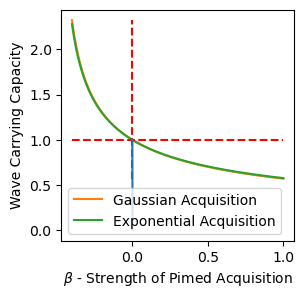

In [6]:
beta_range = np.linspace(-0.4, 1, 100)
plt.figure(figsize = [3, 3])
Y1 = ratio_guassian(beta_range)
Y2 = ratio_exponent(beta_range)
plt.errorbar([0, 0.001], [1, 0], [0.01, 0])
plt.plot(beta_range, Y1, label = "Gaussian Acquisition")
plt.xlabel(r"$\beta$ - Strength of Pimed Acquisition")
plt.ylabel("Wave Carrying Capacity")
plt.plot(beta_range, Y2, label = "Exponential Acquisition")
plt.plot(beta_range, np.ones_like(beta_range), linestyle = "--", color = "red")
plt.vlines(0, min(Y1), max(Y1), linestyle = "--", color = "red")
plt.legend()

In [13]:
%run ../Scripts/formulas.py
%run ../Scripts/initMethods.py

In [14]:
def population_increase(beta, params, sim_params):
    R = params["R0"]
    M = params["M"]
    return 1/(np.power(R, 1/M)*(pi_guassian(beta)-1)+1)

In [15]:
params = { #parameters relevant for the equations
    "Nh":             1E8,
    "N0":             1E7, #This Will be updated by self-consitent solution
    "R0":              20, 
    "M":               10, #Also L, total number of spacers
    "mu":             0.1, #mutation rate
    "gamma_shape":     20, 
    "Np":               0, #Number of Cas Protein
    "dc":               3, #Required number of complexes to activate defence
    "h":                4, #coordination coeff
    "r":             2000, #cross-reactivity kernel
    "beta":         0.000,
}
sim_params = {"dx": 1,}

In [36]:
params["mu"] = 0.1
params["M"] = 10
params["R0"] = 2
params, sim_params = init_cond(params, sim_params, out_print=True)
beta_data = np.linspace(-0.4, 1, 100)
var = calculate_var(params["N"], params, sim_params)
population_range = [params["N"]*population_increase(beta, params, sim_params) for beta in beta_data]
N_range4 = population_range
var_range4 = [calculate_var(N, params, sim_params) for N in population_range]
vel_range4 = [calculate_velocity(N, params, sim_params) for N in population_range]

Phage Population: 18895.0000| Uc: 33.6684| sigma: 14.0891
Phage Population: 2556.4465| Uc: 20.4847| sigma: 12.4433
Phage Population: 1994.0686| Uc: 18.5609| sigma: 12.1403
Phage Population: 1898.1262| Uc: 18.1673| sigma: 12.0754
Phage Population: 1877.8901| Uc: 18.0811| sigma: 12.0611
Phage Population: 1873.4334| Uc: 18.0620| sigma: 12.0579
Phage Population: 1872.4425| Uc: 18.0577| sigma: 12.0572
Phage Population: 1872.2217| Uc: 18.0558| sigma: 12.0568


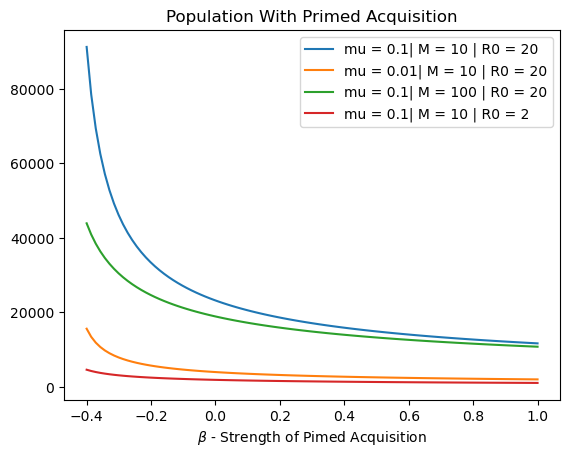

In [38]:
plt.figure()
plt.plot(beta_data, N_range, label = f"mu = {0.1}| M = {10} | R0 = {20}")
plt.plot(beta_data, N_range2, label = f"mu = {0.01}| M = {10} | R0 = {20}")
plt.plot(beta_data, N_range3, label = f"mu = {0.1}| M = {100} | R0 = {20}")
plt.plot(beta_data, N_range4, label = f"mu = {0.1}| M = {10} | R0 = {2}")
# plt.hlines(params["N"], beta_data[0], beta_data[-1], color = 'red')
plt.title("Population With Primed Acquisition")
plt.xlabel(r"$\beta$ - Strength of Pimed Acquisition")
plt.legend()
plt.show()


In [74]:
sim_params

{'dx': 1,
 'initial_var_n': 8.71975226715209,
 'initial_var_nh': 25.57152144570258}

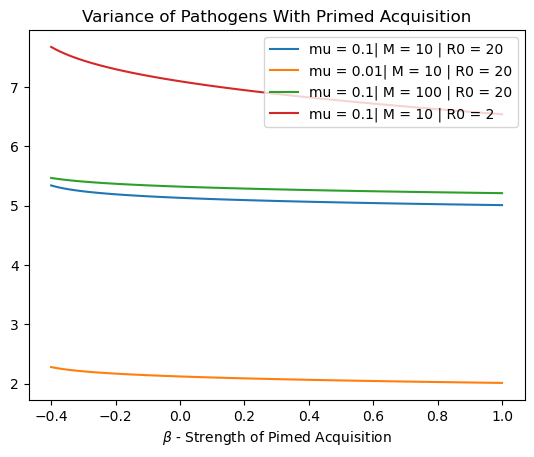

In [39]:
plt.figure()
plt.plot(beta_data, var_range, label = f"mu = {0.1}| M = {10} | R0 = {20}")
plt.plot(beta_data, var_range2, label = f"mu = {0.01}| M = {10} | R0 = {20}")
plt.plot(beta_data, var_range3, label = f"mu = {0.1}| M = {100} | R0 = {20}")
plt.plot(beta_data, var_range4, label = f"mu = {0.1}| M = {10} | R0 = {2}")
# plt.hlines(params["N"], beta_data[0], beta_data[-1], color = 'red')
plt.title("Variance of Pathogens With Primed Acquisition")
plt.xlabel(r"$\beta$ - Strength of Pimed Acquisition")
plt.legend()
plt.show()

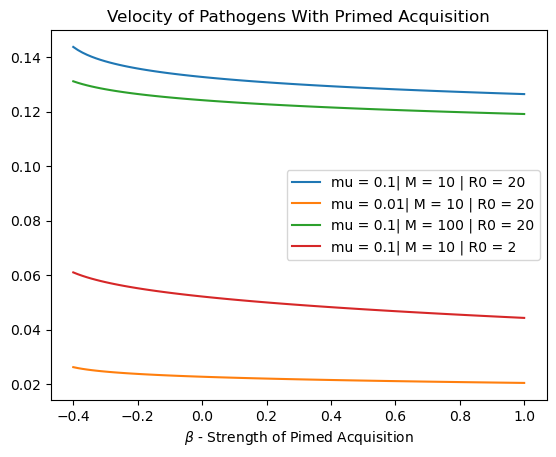

In [40]:
plt.figure()
plt.plot(beta_data, vel_range, label = f"mu = {0.1}| M = {10} | R0 = {20}")
plt.plot(beta_data, vel_range2, label = f"mu = {0.01}| M = {10} | R0 = {20}")
plt.plot(beta_data, vel_range3, label = f"mu = {0.1}| M = {100} | R0 = {20}")
plt.plot(beta_data, vel_range4, label = f"mu = {0.1}| M = {10} | R0 = {2}")
# plt.hlines(params["N"], beta_data[0], beta_data[-1], color = 'red')
plt.title("Velocity of Pathogens With Primed Acquisition")
plt.xlabel(r"$\beta$ - Strength of Pimed Acquisition")
plt.legend()
plt.show()